In [224]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.wcs import WCS
import astropy.units as units
from fractions import Fraction
from reproject import reproject_interp
from astropy.visualization.wcsaxes import add_beam, add_scalebar
from tqdm import tqdm
import json
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel

In [ ]:
parent_dir = '/srv/nmohamme/notebooks/FRII_tidy/QU-Fitting_depol/QU_results/' 

# pI Maps

In [225]:
#--- Load GMIMS data, GMIMS wcs, and array of GMIMS frequencies
fn = '/srv/data/gmims/gmims-hbn/GMIMS-HBN_v1_gal_car_freq_IQU.fits'

hdr_gmims = fits.getheader(fn)
gmimsU = fits.getdata(fn)[2]
gmimsQ = fits.getdata(fn)[1]

wcs_gmims=WCS(hdr_gmims)

gmims_freq=wcs_gmims.wcs_pix2world(1, 1, np.arange(0, hdr_gmims['NAXIS3'], 1), 1, 1)[2]

In [226]:
gmimspI = np.sqrt(gmimsQ**2 + gmimsU**2)

In [227]:
gmims_lim = np.fix(wcs_gmims.wcs_world2pix([150,115],[-10,15], 1,1,1)[0:2])


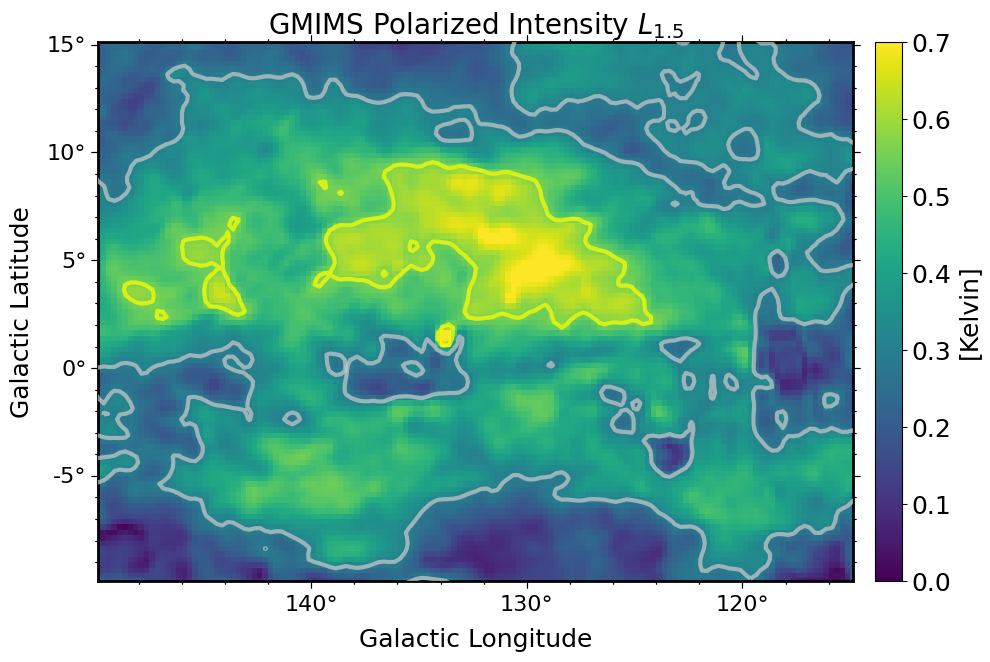

In [228]:
fig = plt.figure(figsize=(10*1.4, 5*1.4))

ax = fig.add_subplot(111, projection=wcs_gmims.celestial)
im = ax.imshow(gmimspI[190], cmap='viridis', interpolation='none', vmin=0, vmax=0.7)

ax.set_title(r"GMIMS Polarized Intensity $L_{1.5}$", 
             fontsize=20)
olors = ['0.8','yellow']
levels = [0.3, 0.56]  # Define contour levels to use
ax.contour(gmimspI[190], alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(gmims_lim[0])
ax.set_ylim(gmims_lim[1])


ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[Kelvin]', fontsize=18)

#add_beam(ax, major=0.7*u.arcmin, minor=0.7*u.arcmin, angle=0, frame=True, facecolor='k')


In [229]:
#--- Load Dragons data, Dragons wcs, and array of Dragons frequencies
# This is a subset of the Dragons frequencies, low frequencies are not good enough to use yet

#--- Dragons WCS doesn't have the frequencies set, so we load them in seperate
file_path = '/srv/data/dragons/Mar2024_500_1000_MHz_cube/ListOfFrequencies_Hz.txt'
drag_freq = np.loadtxt(file_path)

#--- Convert Dragons from Jy/beam to Kelvin
jansk_to_K_drag = np.load('/srv/data/dva/JypK.npy')
unbinned_freq_drag = np.load('/srv/data/dva/abscalfreqs.npy')*1e6
indexes = np.searchsorted(unbinned_freq_drag, drag_freq)

fn = '/srv/data/dragons/Mar2024_500_1000_MHz_cube/DRAGONS_500_to_1024_q_cube_32bit_gal.fits'
hdr_dragq = fits.getheader(fn)
dragQ = fits.getdata(fn)
wcs_drag = WCS(hdr_dragq)

fn = '/srv/data/dragons/Mar2024_500_1000_MHz_cube/DRAGONS_500_to_1024_u_cube_32bit_gal.fits'
dragU = fits.getdata(fn)

dragpI = np.sqrt(dragQ**2 + dragU**2)


a floating-point value was expected. [astropy.wcs.wcs]


In [230]:
drag_lim = np.fix(wcs_drag.wcs_world2pix([150,115],[-10,15], 1,1,)[0:2])


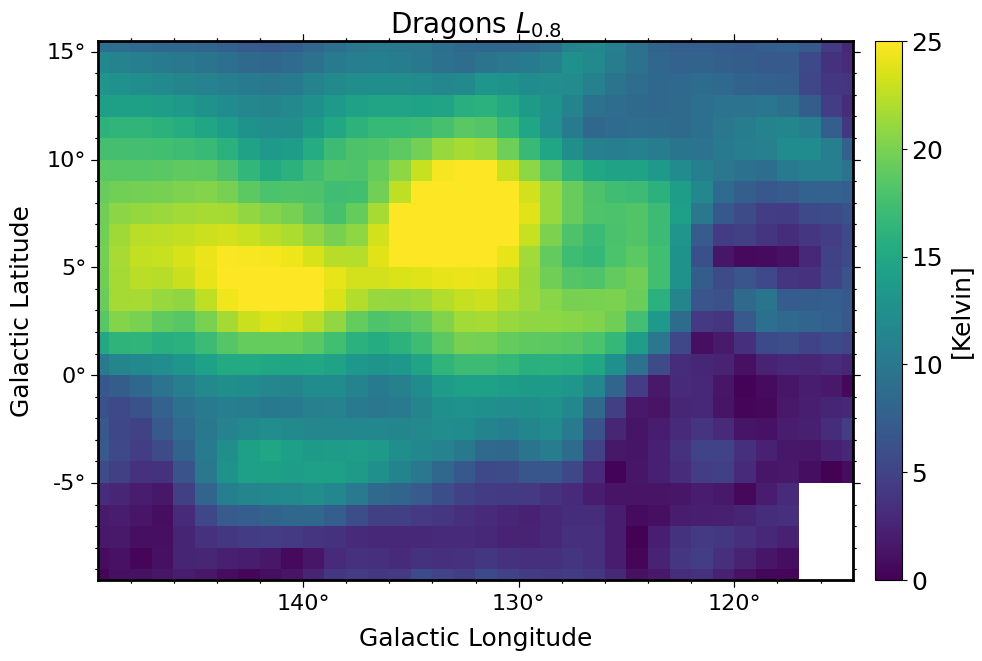

In [231]:
fig = plt.figure(figsize=(10*1.4, 5*1.4))

ax = fig.add_subplot(111, projection=wcs_drag.celestial)
im = ax.imshow(dragpI[90], cmap='viridis', interpolation='none', vmin=0, vmax=25)

ax.set_title(r"Dragons $L_{0.8}$", 
             fontsize=20)
ax.set_xlim(drag_lim[0])
ax.set_ylim(drag_lim[1])

ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[Kelvin]', fontsize=18)

#add_beam(ax, major=0.7*u.arcmin, minor=0.7*u.arcmin, angle=0, frame=True, facecolor='k')


In [232]:
# This is the GMIMS data that has been convolved to dragon's common 2.4 degree beam

fn = '/srv/nmohamme/fanregionII/data/gmims_u_frac_dragon_beam.fits'
hdr_gmims = fits.getheader(fn)
gmims_u_convolved = fits.getdata(fn)

fn = '/srv/nmohamme/fanregionII/data/gmims_q_frac_dragon_beam.fits'
gmims_q_convolved = fits.getdata(fn)


In [233]:
gmimspI_convolved = np.sqrt(np.asarray(gmims_q_convolved)**2 + np.asarray(gmims_u_convolved)**2)

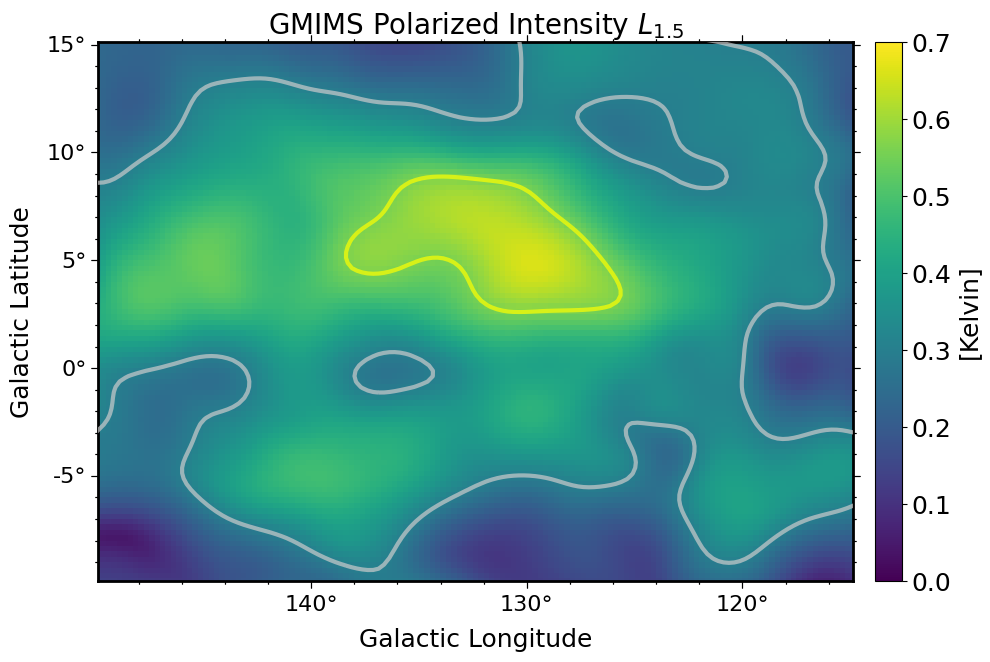

In [234]:
fig = plt.figure(figsize=(10*1.4, 5*1.4))

ax = fig.add_subplot(111, projection=wcs_gmims.celestial)
im = ax.imshow(gmimspI_convolved[190], cmap='viridis', interpolation='none', vmin=0, vmax=0.7)

ax.set_title(r"GMIMS Polarized Intensity $L_{1.5}$", 
             fontsize=20)
olors = ['0.8','yellow']
levels = [0.3, 0.56]  # Define contour levels to use
ax.contour(gmimspI_convolved[190], alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(gmims_lim[0])
ax.set_ylim(gmims_lim[1])


ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[Kelvin]', fontsize=18)

#add_beam(ax, major=0.7*u.arcmin, minor=0.7*u.arcmin, angle=0, frame=True, facecolor='k')


# Modeling & Overlay

In [235]:
def model6(pDict, lamSqArr_m2):
    """Single Faraday component with Tribble depolarisation"""

    # Calculate the complex fractional q and u spectra
    pArr = pDict[0] * np.ones_like(lamSqArr_m2)
    quArr = (
        pArr
        * np.exp(2j * (np.radians(pDict[1]) + pDict[2] * lamSqArr_m2))
        *(pDict[4]**(-0.5)/(pDict[3]*lamSqArr_m2*np.sqrt(2)))
    )

    return quArr


def model33(pDict, lamSqArr_m2):
    """Two separate Faraday components, averaged within same telescope beam
    (i.e., unresolved), with a common Burn depolarisation term."""

    # Calculate the complex fractional q and u spectra
    pArr1 = pDict[1] * np.ones_like(lamSqArr_m2)
    pArr2 = pDict[2] * np.ones_like(lamSqArr_m2)
    quArr1 = pArr1 * np.exp(
        2j * (np.radians(pDict[3]) + pDict[5] * lamSqArr_m2)
    )
    quArr2 = pArr2 * np.exp(
        2j * (np.radians(pDict[4]) + pDict[6] * lamSqArr_m2)
    )
    quArr = (quArr1 + quArr2) * np.exp(
        (pDict[0]**(-0.5)/(pDict[7]*lamSqArr_m2*np.sqrt(2)))
    )

    return quArr

In [259]:
clist = SkyCoord([130,136,140,134, 143.2,132, 150]*units.deg, [5.0,0,5,3.5, 7.6, 12, 20]*units.deg, frame='galactic')
sampler_used = 'pymultinest' #reccomended sampling model
model_used = 55 
drag_beam_eff= 0.7 #Beam efficiency for Dragons
note = f'may2' #Any notes you want to add to the directory name

data = {}
q = {}
u = {}
key_list=[]
lpix = [];bpix=[];cs=[]
for c in clist:

    key = f"{int(c.l.value)},{int(c.b.value)}"
    key_list.append(key)
    directory = str(int(c.l.value)) + '_' + str(int(c.b.value))+'_m'+str(model_used)+'_'+str(sampler_used)+'_'+str(note)
    path = parent_dir+directory
    fn = path+'/qufit_' + str(int(c.l.value)) + '_' + str(int(c.b.value))+'_m'+str(model_used)+'_'+str(sampler_used)+'.json'
    with open(fn, 'r') as json_file:
        data[key] = json.load(json_file)

    q[key] = np.load(parent_dir+'/spectra_files/'+directory + 'qArr_' + str(int(c.l.value)) + '_' + str(int(c.b.value))+'.npy')
    u[key] = np.load(parent_dir+'/spectra_files/'+directory + 'uArr_' + str(int(c.l.value)) + '_' + str(int(c.b.value))+'.npy')
    data_freq = np.load(parent_dir+'/spectra_files/'+directory +'freqArr_' + str(int(c.l.value)) + '_' + str(int(c.b.value))+'.npy')


    lpix.append(wcs_gmims.wcs_world2pix(c.l.value, c.b.value, 1, 1, 1)[0])
    bpix.append(wcs_gmims.wcs_world2pix(c.l.value, c.b.value, 1, 1, 1)[1])
    sigma_idx = data[key]['parNames'].index('sigmaRM_radm2')
    cs.append(data[key]['values'][sigma_idx])

In [260]:
model = model6

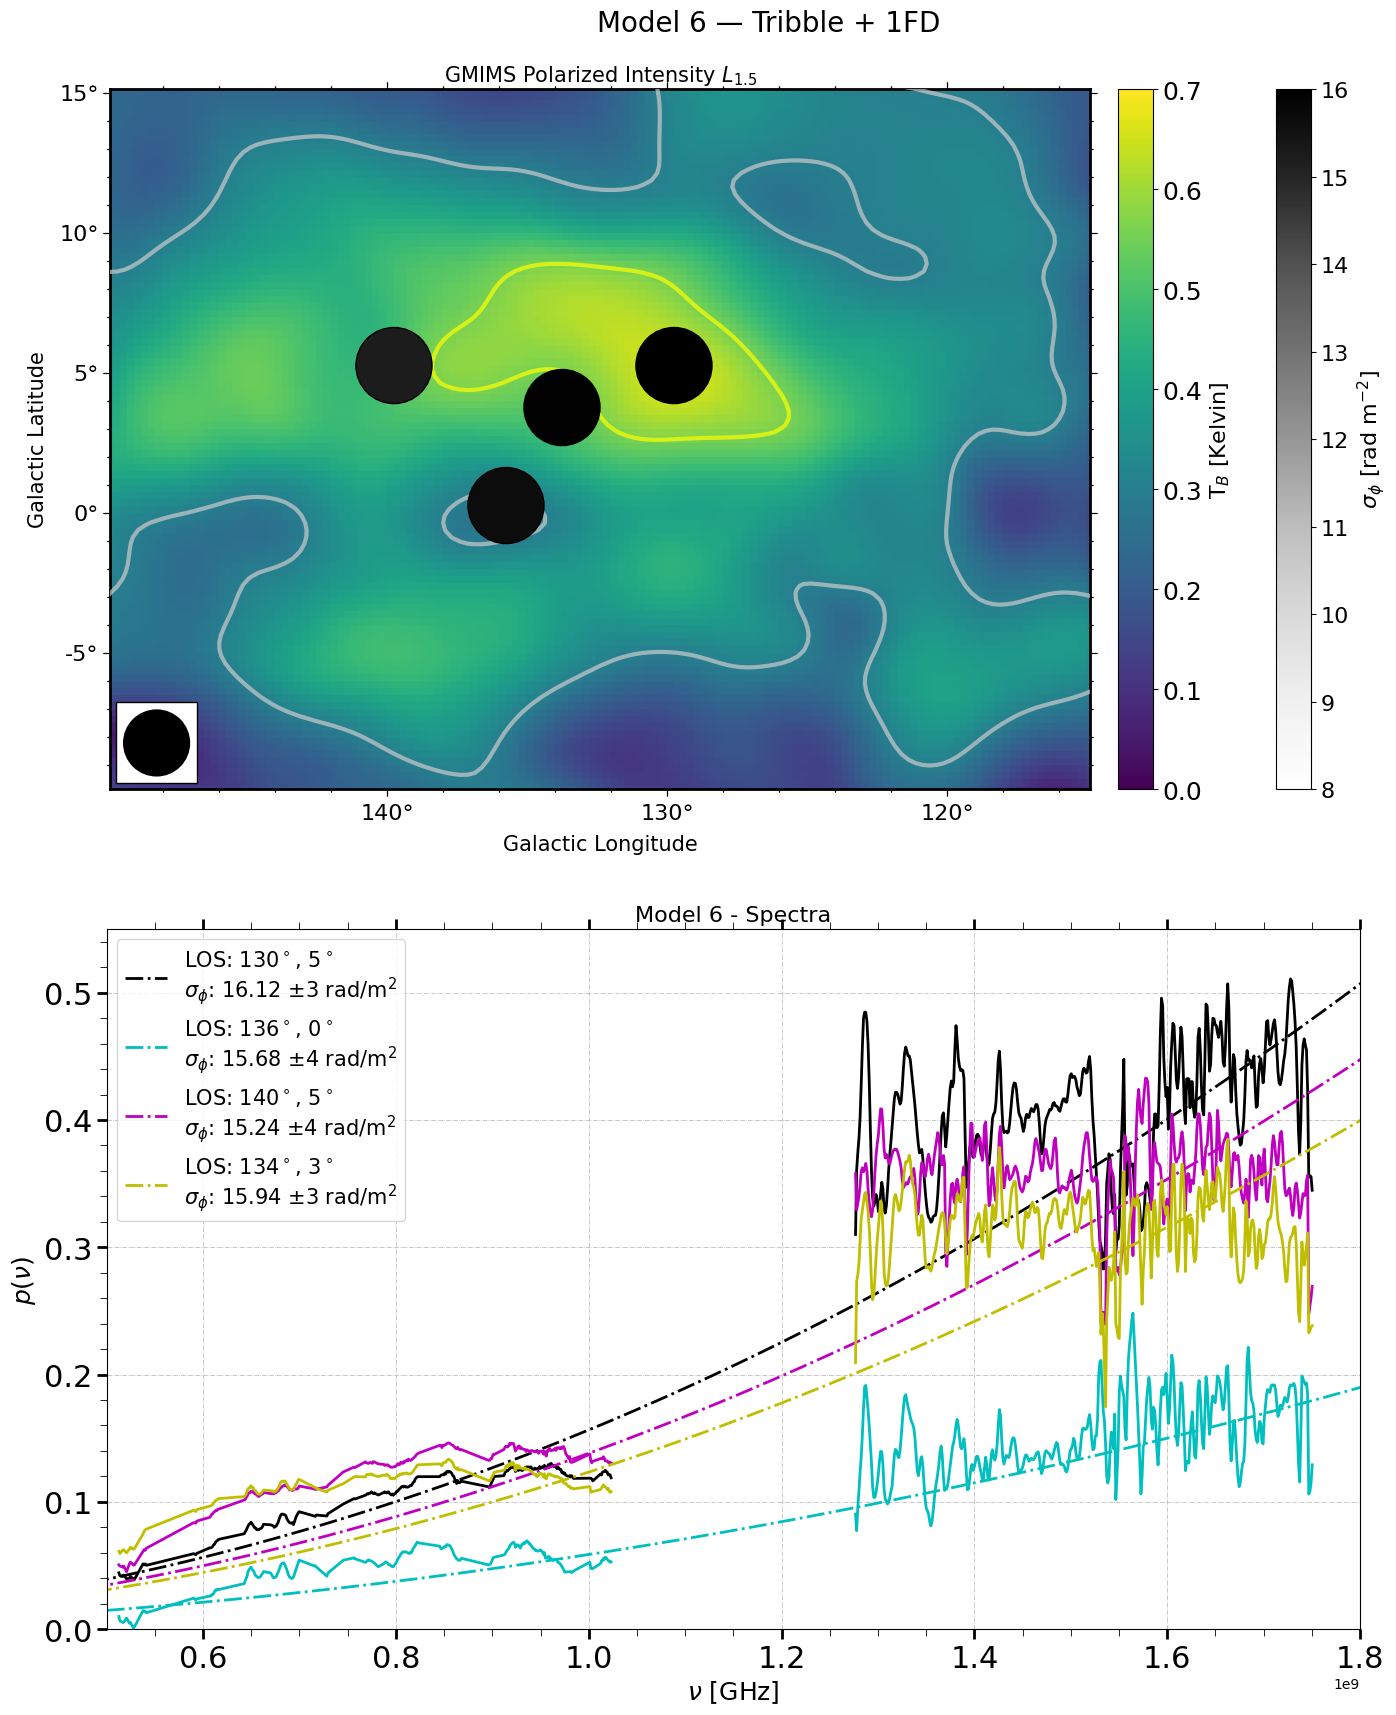

In [266]:
fig = plt.figure(figsize=(20, 20))
plt.suptitle(rf'Model {model_used} — Tribble + 1FD', fontsize=20, y=0.92, x=0.53)

##############################################################
##############################################################
# plots GMIMS map with overlayed points

ax = fig.add_subplot(211, projection=wcs_gmims.celestial)
im = ax.imshow(gmimspI_convolved[190], cmap='viridis', interpolation='none', vmin=0, vmax=0.7)

ax.set_title(r"GMIMS Polarized Intensity $L_{1.5}$", 
             fontsize=15)
olors = ['0.8','yellow']
levels = [0.3, 0.56]  # Define contour levels to use
ax.contour(gmimspI_convolved[190], alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(gmims_lim[0])
ax.set_ylim(gmims_lim[1])

im2 = ax.scatter(lpix, bpix, cmap ='Greys',c=cs, s=3000, zorder=30, edgecolor='k', vmin=8, vmax=16)
cbar2 = plt.colorbar(im2, ax=ax, shrink=1, pad=-0.03)
cbar2.ax.tick_params(labelsize=16)
cbar2.set_label(r'$\sigma_\phi$ [rad m$^{-2}$]', fontsize=16)

ax.set_xlabel("Galactic Longitude", fontsize=15)
ax.set_ylabel("Galactic Latitude", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'T$_B$ [Kelvin]', fontsize=16)

add_beam(ax, major=2.4*units.deg, minor=2.4*units.deg, angle=0, frame=True, facecolor='k')

##############################################################
##############################################################
#plots spectra


ax = fig.add_subplot(212)

lamSqArr_m2 = np.linspace(0.001, 2, 10000)
nuArr_Hz= 3e8/np.sqrt(lamSqArr_m2)

for c, color in zip(clist, ['k', 'c', 'm', 'y']):
    key = f"{int(c.l.value)},{int(c.b.value)}"
    err = np.mean((data[key]['errPlus'][sigma_idx], data[key]['errMinus'][sigma_idx]))
    ax.plot(data_freq, np.sqrt(q[key]**2+u[key]**2), c=color, lw=2)
    ax.plot(nuArr_Hz, np.abs(model(data[key]['values'], lamSqArr_m2)), c=color, lw=2, ls='-.', 
            label=fr'LOS: {int(c.galactic.l.value)}$^\circ$, {int(c.galactic.b.value)}$^\circ$'
            + '\n' + r'$\sigma_{\phi}$: ' + f'{round(data[key]["values"][sigma_idx],2)} ' + r'$\pm$'+f'{int(err)}' + r' rad/m$^2$')



    ax.set_ylim(0, 0.55)
    ax.set_xlim(0.5e9, 1.8e9)
    ax.set_aspect(1.32e9)
    ax.minorticks_on()  # Enable minor ticks for the first subplot
    ax.grid(which='major', linestyle='-.', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=22, zorder=30, length=7, width=2, top=True)
    ax.tick_params(axis='both', which='minor', length=5, top=True)
    ax.set_title(f'Model {model_used} - Spectra', fontsize=16)

    ax.set_xlabel(r'$\nu$ [GHz]', fontsize=18)
    ax.set_ylabel(r'${p}(\nu)$', fontsize=18);
    ax.legend(fontsize=15,ncol=1, loc='upper left')#, bbox_to_anchor=(1, 0.6))

    plt.savefig(f'/srv/nmohamme/notebooks/FRII_tidy/figures/sigma_overlay_many1_m{model_used}_{note}_{str(sampler_used)}.png', bbox_inches='tight', pad_inches=0.1)
